[[   6.350653    11.487847   -34.28761   1046.2543    -158.6907
     1.7177918  891.95       166.50795    797.55396     57.20065
  1388.308      970.66876      9.703743 ]]


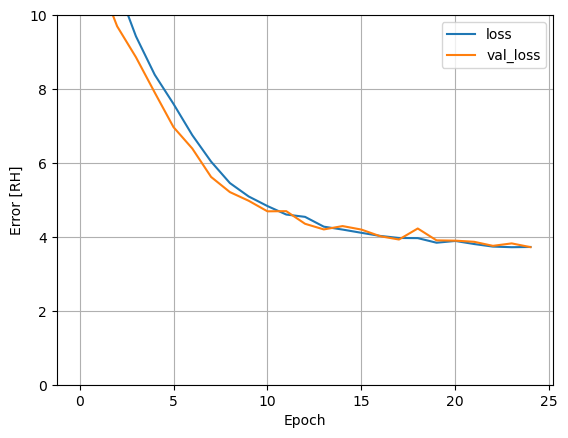

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
import warnings

warnings.filterwarnings('ignore')

column_names = ['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)',
                'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

raw_dataset = pd.read_csv("AirQualityUCI.csv")


df = raw_dataset.copy()
df.drop(['un1','un2','AH'],axis=1,inplace=True)
df.isna().sum()
dataset = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = df['Date'].dt.month
df['Time'] = df['Time'].dt.hour

df.head()

train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RH')
test_labels = test_features.pop('RH')
#sns.pairplot(train_dataset[['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']], diag_kind='kde')
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
#print(train_dataset.describe().transpose())
print(normalizer.mean.numpy())

def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)


dnn_model = build_and_compile_model(normalizer)
#print(dnn_model.summary())
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=25)

plot_loss(history)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
import warnings

warnings.filterwarnings('ignore')

In [4]:
raw_dataset = pd.read_csv("AirQualityUCI.csv")
df = raw_dataset.copy()

In [5]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,un1,un2
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,NaN,NaN
9353,04-04-2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,NaN,NaN
9354,04-04-2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,NaN,NaN
9355,04-04-2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,NaN,NaN


In [6]:
df.drop(['un1','un2','AH'],axis=1,inplace=True)
df.isna().sum()
dataset = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = df['Date'].dt.month
df['Time'] = df['Time'].dt.hour


In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10,18,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9
1,10,19,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7
2,10,20,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0
3,10,21,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0
4,10,22,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6


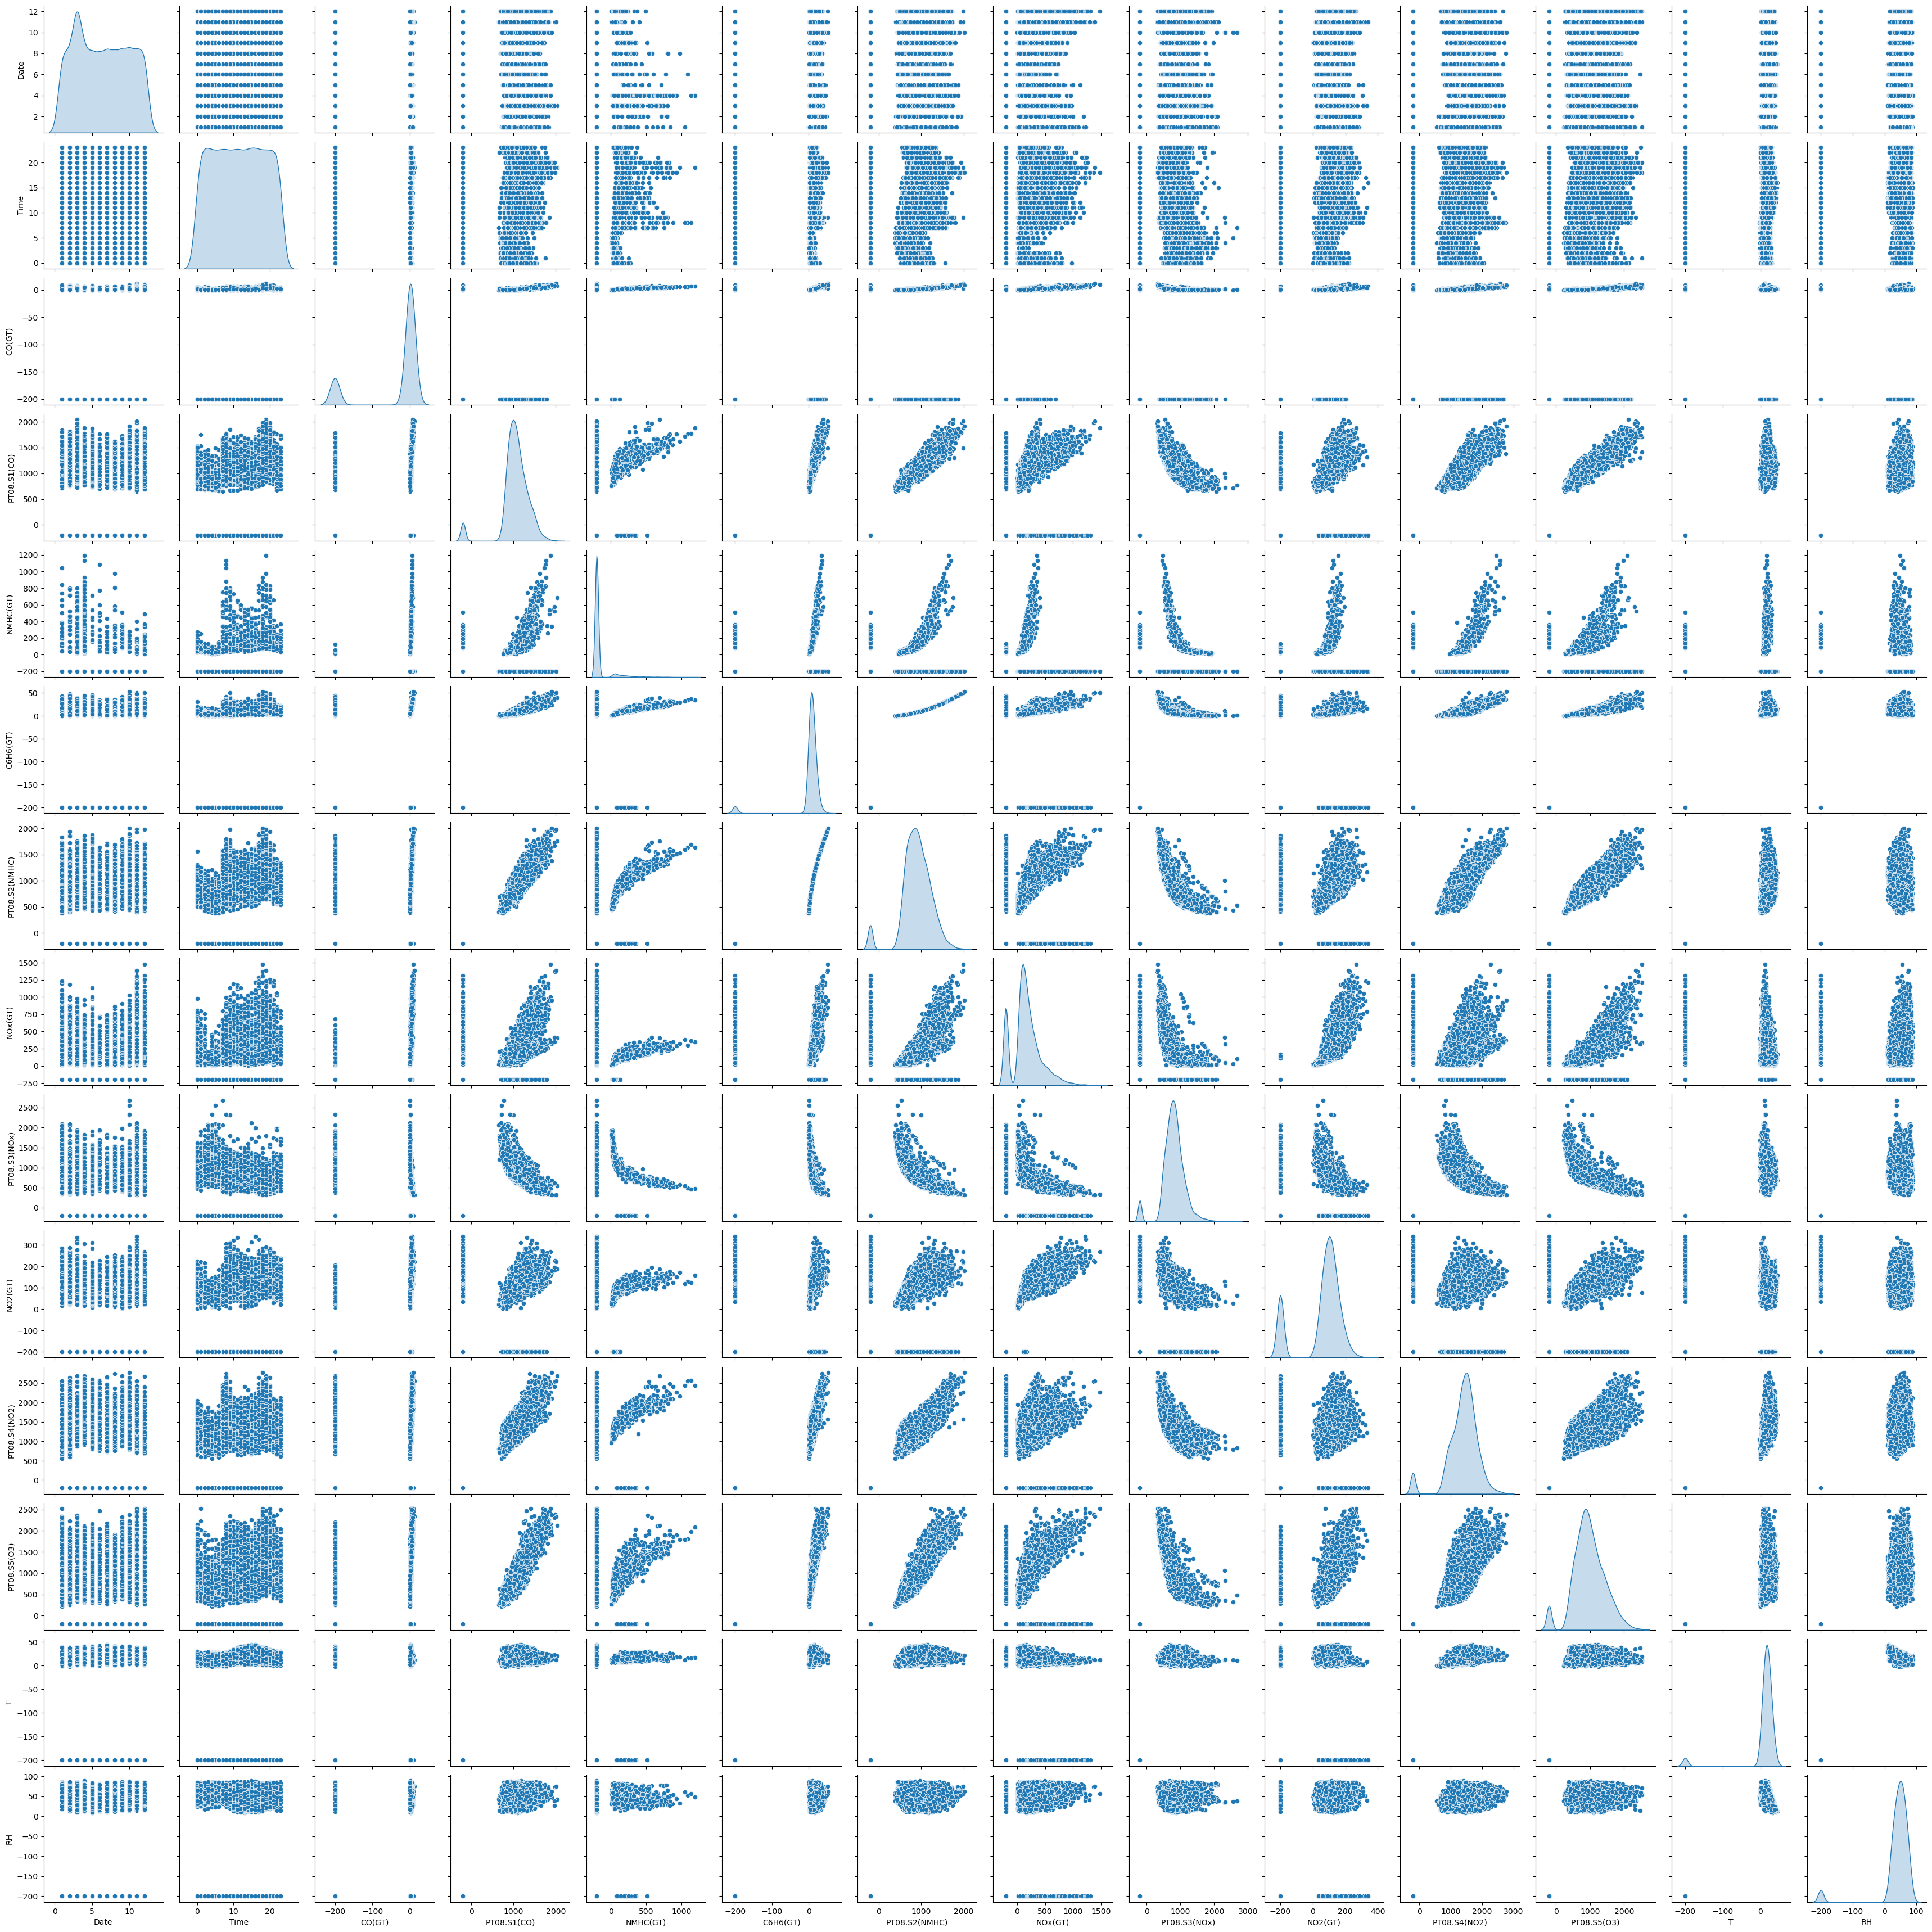

In [8]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RH')
test_labels = test_features.pop('RH')
sns.pairplot(train_dataset[['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']], diag_kind='kde')
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Date,7486.0,6.350655,3.470431,1.0,3.00,6.0,9.000,12.0
Time,7486.0,11.487844,6.934799,0.0,5.00,11.0,17.000,23.0
CO(GT),7486.0,-34.287617,77.709461,-200.0,0.60,1.5,2.600,11.9
PT08.S1(CO),7486.0,1046.254208,329.792940,-200.0,919.25,1050.0,1217.000,2040.0
NMHC(GT),7486.0,-158.690756,140.800954,-200.0,-200.00,-200.0,-200.000,1189.0
C6H6(GT),7486.0,1.717793,41.571183,-200.0,4.00,7.8,13.575,52.1
PT08.S2(NMHC),7486.0,891.950040,342.325696,-200.0,708.25,893.0,1102.000,2007.0
NOx(GT),7486.0,166.507881,256.091422,-200.0,49.00,140.0,282.000,1479.0
PT08.S3(NOx),7486.0,797.553967,324.834524,-200.0,639.00,797.0,962.000,2683.0
NO2(GT),7486.0,57.200641,127.148003,-200.0,53.00,96.0,132.000,340.0


In [10]:
print(normalizer.mean.numpy())

[[   6.350653    11.487847   -34.28761   1046.2543    -158.6907
     1.7177918  891.95       166.50795    797.55396     57.20065
  1388.308      970.66876      9.703743 ]]


In [11]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)

In [12]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [16]:
dnn_model1 = build_and_compile_model(normalizer)
dnn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_________________________________________________________________


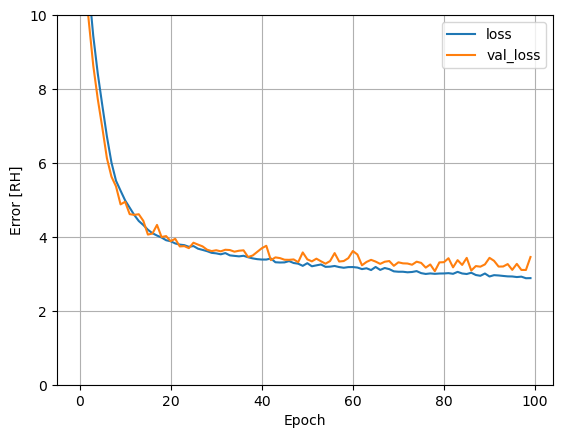

In [17]:
history = dnn_model1.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [18]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 32)                448       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,620
Trainable params: 2,593
Non-trainable params: 27
___________________________________________________

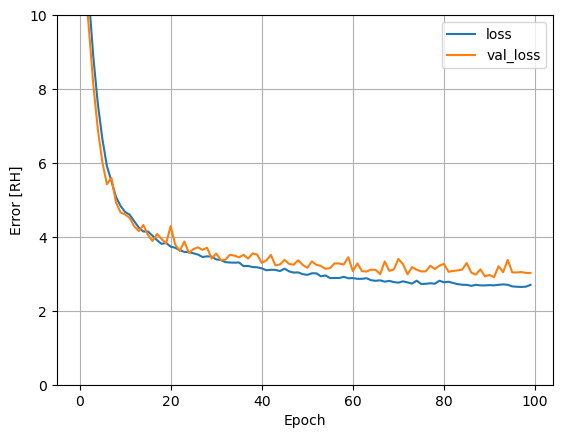

In [19]:
dnn_model2 = build_and_compile_model(normalizer)
dnn_model2.summary()
history = dnn_model2.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [20]:
test_results = {}
test_results['dnn_model1'] = dnn_model1.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model2'] = dnn_model2.evaluate(test_features, test_labels, verbose=0)

In [22]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_14 (Dense)            (None, 64)                896       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,308
Trainable params: 9,281
Non-trainable params: 27
___________________________________________________

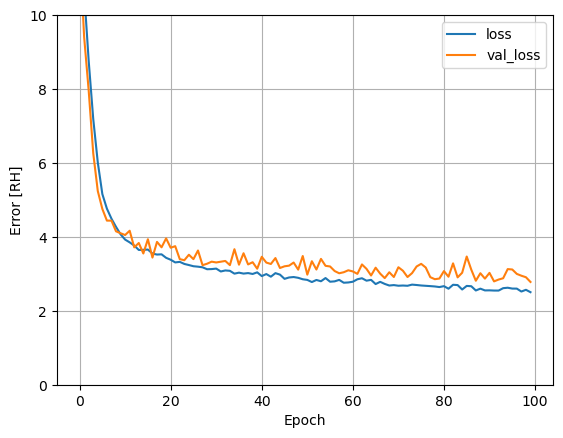

In [24]:
dnn_model3 = build_and_compile_model(normalizer)
dnn_model3.summary()
history = dnn_model3.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [25]:
test_results = {}
test_results['dnn_model1'] = dnn_model1.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model2'] = dnn_model2.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model3'] = dnn_model3.evaluate(test_features, test_labels, verbose=0)

In [27]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_18 (Dense)            (None, 16)                224       
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                      

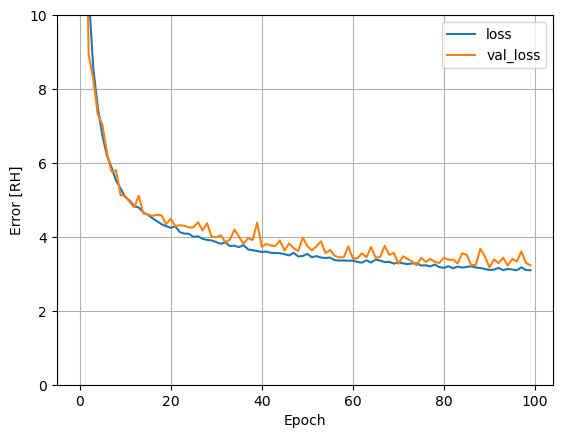

In [28]:
dnn_model4 = build_and_compile_model(normalizer)
dnn_model4.summary()
history = dnn_model4.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [29]:
test_results['dnn_model4'] = dnn_model4.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
dnn_model1,3.521873
dnn_model2,3.091038
dnn_model3,2.861282
dnn_model4,3.474049


In [31]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_25 (Dense)            (None, 256)               3584      
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36,636
Trainable params: 36,609
Non-trainable params: 27
_________________________________________________________________


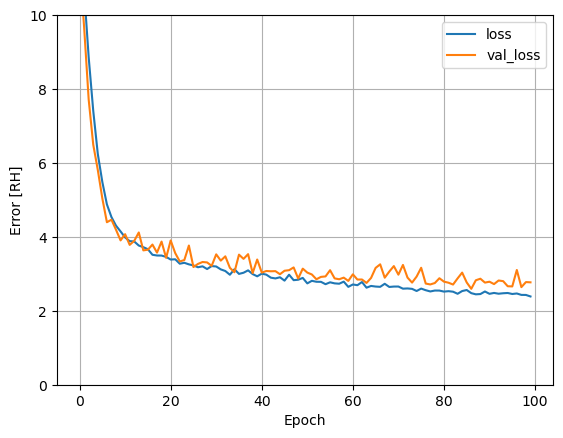

In [32]:
dnn_model5 = build_and_compile_model(normalizer)
dnn_model5.summary()
history = dnn_model5.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [34]:
test_results['dnn_model5'] = dnn_model5.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
dnn_model1,3.521873
dnn_model2,3.091038
dnn_model3,2.861282
dnn_model4,3.474049
dnn_model5,2.810061


In [35]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_28 (Dense)            (None, 512)               7168      
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 dense_30 (Dense)            (None, 1)                 513       
                                                                 
Total params: 270,364
Trainable params: 270,337
Non-trainable params: 27
_________________________________________________________________


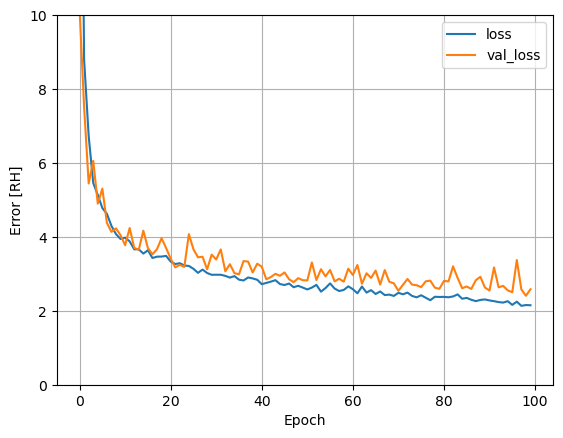

In [36]:
dnn_model6 = build_and_compile_model(normalizer)
dnn_model6.summary()
history = dnn_model6.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [37]:
test_results['dnn_model6'] = dnn_model6.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
dnn_model1,3.521873
dnn_model2,3.091038
dnn_model3,2.861282
dnn_model4,3.474049
dnn_model5,2.810061
dnn_model6,2.618846


In [38]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(1028, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_31 (Dense)            (None, 1028)              14392     
                                                                 
 dense_32 (Dense)            (None, 1)                 1029      
                                                                 
Total params: 15,448
Trainable params: 15,421
Non-trainable params: 27
_________________________________________________________________


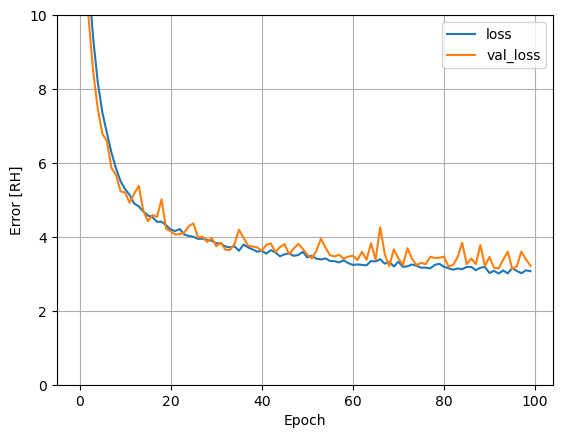

In [39]:
dnn_model7 = build_and_compile_model(normalizer)
dnn_model7.summary()
history = dnn_model7.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [41]:
test_results['dnn_model7'] = dnn_model7.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
dnn_model1,3.521873
dnn_model2,3.091038
dnn_model3,2.861282
dnn_model4,3.474049
dnn_model5,2.810061
dnn_model6,2.618846
dnn_model7,3.307371


In [42]:
#model6 has the least error. Let us save it.
dnn_model6.save('dnn_model6')

INFO:tensorflow:Assets written to: dnn_model6\assets


INFO:tensorflow:Assets written to: dnn_model6\assets
